In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries
df = pd.read_csv("Churn_Modelling.csv")


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


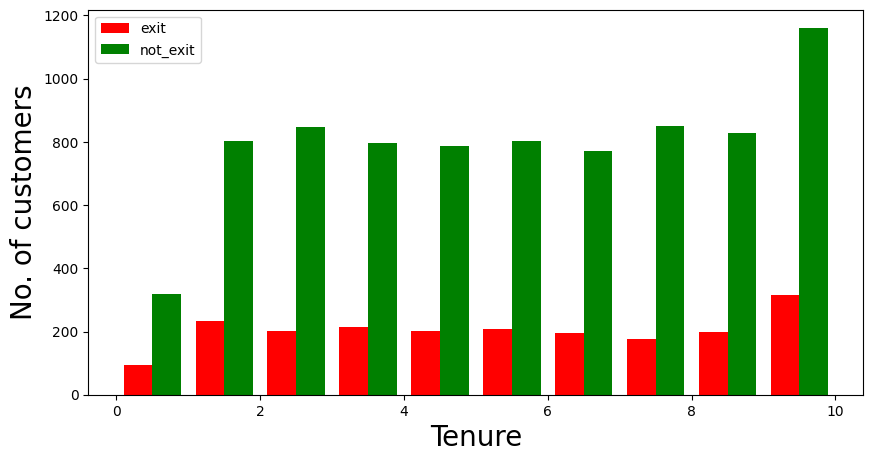

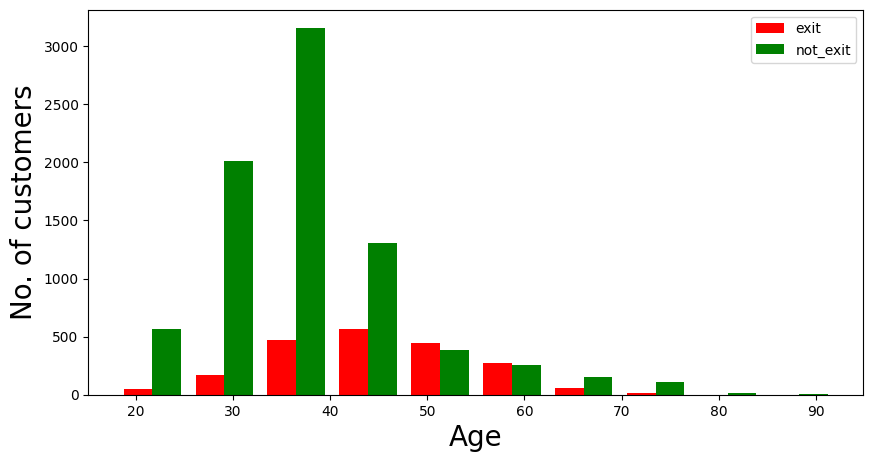

In [15]:
# visualization
def visualization(x, y, xlabel):
  plt.figure(figsize=(10,5))
  plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
  plt.xlabel(xlabel,fontsize=20)
  plt.ylabel("No. of customers", fontsize=20)
  plt.legend()
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [16]:
#Converting the Categorical Variables:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)
df = pd.concat([df,gender,states], axis = 1)

In [18]:
#Splitting the training and testing Dataset
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [19]:
#Normalizing the values with mean as 0 and Standard Deviation as 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train
X_test


array([[-1.0756516 , -0.8519725 , -0.00843101, ..., -1.0944415 ,
        -0.57735027, -0.5705318 ],
       [-0.92043577, -0.66098398,  0.33872822, ...,  0.91370804,
         1.73205081, -0.5705318 ],
       [-0.0822703 , -1.3294438 ,  0.68588745, ...,  0.91370804,
        -0.57735027, -0.5705318 ],
       ...,
       [ 1.49058342,  0.67593565,  1.03304669, ..., -1.0944415 ,
        -0.57735027,  1.75275068],
       [-0.23748613,  0.48494713,  0.33872822, ...,  0.91370804,
        -0.57735027,  1.75275068],
       [-0.70313361,  0.1029701 ,  1.38020592, ..., -1.0944415 ,
        -0.57735027, -0.5705318 ]])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7965 - loss: 0.5648
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8087 - loss: 0.4210
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8155 - loss: 0.4341
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8361 - loss: 0.4105
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8347 - loss: 0.4098
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8357 - loss: 0.4080
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8320 - loss: 0.4153
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8363 - loss: 0.4106
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8362 - loss: 0.4055
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8379 - loss: 0.3947
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8414 - loss: 0.3996
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

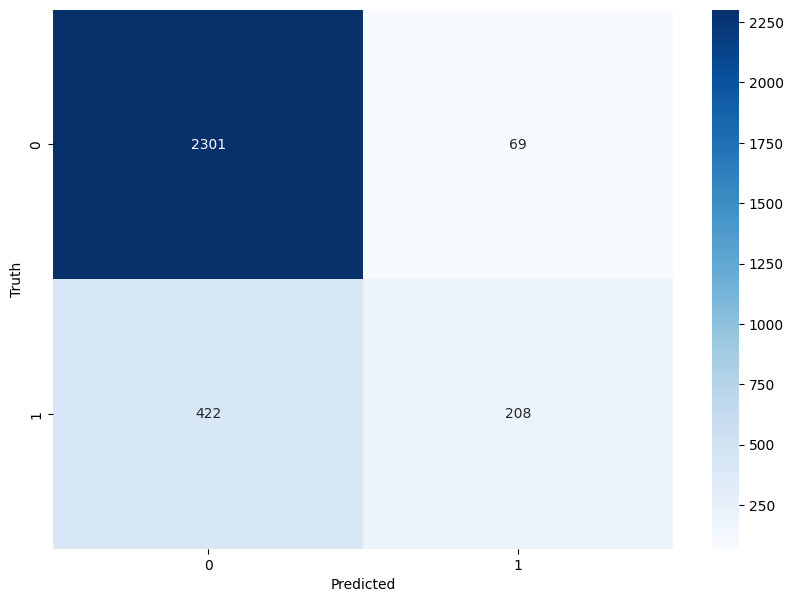

In [21]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the classifier
classifier = Sequential()

# Add layers to the model
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compile the model
classifier.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
classifier.summary()

# Fit the model
classifier.fit(X_train, y_train, batch_size=10, epochs=50)

# Predict the results on the test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary output

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
# prompt: generate conclusion from above codes.

## Conclusion

#This code analyzes a customer churn dataset ("Churn_Modelling.csv") to build a predictive model using a neural network.

#**Key Steps:**

#1. **Data Exploration and Preprocessing:** The code begins by loading the dataset, exploring its structure, handling missing values, and dropping irrelevant columns.
#2. **Data Visualization:** It creates visualizations to understand the relationship between customer churn ('Exited') and features like 'Tenure' and 'Age'.
#3. **Feature Engineering:** Categorical variables ('Geography' and 'Gender') are converted into numerical features using one-hot encoding.
#4. **Data Splitting and Scaling:** The dataset is split into training and testing sets, and features are scaled using StandardScaler for improved model performance.
#5. **Neural Network Model:** A sequential neural network model is built using the Keras library. It consists of multiple dense layers with ReLU activation functions and a final sigmoid activation layer for binary classification (churn or not churn).
#6. **Model Training and Evaluation:** The model is trained using the training data and then evaluated on the test data. Performance metrics such as accuracy, confusion matrix, and classification report are used to assess the model's effectiveness.
#7. **Visualization of Results:** A heatmap of the confusion matrix is generated to visualize the model's performance in classifying churned and non-churned customers.


#**Overall, the code successfully builds and evaluates a neural network model for predicting customer churn. The model's performance (accuracy) is reported, and the confusion matrix helps in understanding the model's strengths and weaknesses in correctly classifying different customer categories.**

#**Potential Further Improvements:**

#* **Hyperparameter Tuning:** Experiment with different network architectures, optimizers, and learning rates to potentially improve model accuracy.
#* **Feature Selection:** Analyze feature importance and select the most relevant features to improve model efficiency and reduce overfitting.
#* **Cross-Validation:** Use cross-validation techniques to obtain a more robust estimate of the model's performance.
#* **Advanced Techniques:** Explore more advanced deep learning architectures or ensemble methods to further enhance model performance.
